
The dataset that we will explore is about the Airbnb in New York for the year 2019.




The variables we have are:


```

id: Number of accommodation
neighbourhood_group: Area
room_type: Accommodation type
price:Price per night (in dollars)
availability_365:Number of days in the year that the accommodation is available for tenancy
```



# **Import the required libraries**


In [ ]:
import pandas as pd
import numpy as np
from statsmodels import robust
import statistics



**Importing the Dataset**

In [ ]:
airbnb_data = pd.read_csv("ABNYC2019.csv",sep=" ")
airbnb_data.head()

,id,neighbourhood_group,room_type,price,availability_365
0,2539,Brooklyn,Private room,149,365
1,2595,Manhattan,Entire home/apt,225,355
2,3647,Manhattan,Private room,150,365
3,3831,Brooklyn,Entire home/apt,89,194
4,5022,Manhattan,Entire home/apt,80,0


**Data Preprocessing**


First of all before starting our data analysis we will check if the variables have been register right and if we have missing values(NA).

In [ ]:
airbnb_data.dtypes

id                      int64
neighbourhood_group    object
room_type              object
price                   int64
availability_365        int64
dtype: object

As we can see above  we have two categorical columns

* **neighbourhood_group:**Bronx,Brooklyn,Manhattan,Queens and Staten Island.
* **room_type:**Entire home/apt, Private room	and Shared room.

while the numerical columns are
* id
* price
* availability_365




We can see below that there are not rows are missing values in our dataset.

> Add blockquote





In [ ]:
airbnb_data.isnull().sum()

id                     0
neighbourhood_group    0
room_type              0
price                  0
availability_365       0
dtype: int64

It is also worth pointing out how price was formed in each neighbourhood with same descriptive measures like the average value(mean),the standard deviation(std),the minimum (min) and maximum (max)value and the percentile(25%,50% and 75%).Where the 50th percentile is is generally the median.



In [ ]:
airbnb_data[['price','neighbourhood_group']].groupby('neighbourhood_group').describe(include='all')

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                                     
                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

**Bronx:**
*   Count: The number of airbnbs that where in Bronx where 1091.
*   Mean: The average price for renting airbnb in neighbourhood Bronx is 87.49\$.
*   Standard Deviation:Is the measure that shows how far values are from the mean.The standard deviation 106.7.
*   Minimum: The minimum price for renting airbnb in neighbourhood Bronx is 0\$.
*   25th Percentile: 25\% of the prices are below 45\$
*   Median (50%):The median price is 65\$.
*   75th Percentile:The 75\% of the prices are below the 99\$.
*  Maximum:The maximum price for renting airbnb in neighbourhood Bronx is 2500\$.

**Brooklyn:**
The mean price for an airbnb in neighbourhood Brooklyn is 124.38\$,with a standard deviation of 186.87,indicates more variability in price compaired to Bronx.

**Manhattan:**
Manhattan had the majority of airbnbs in contrast with the other neighbourhoods,accounting with 21661 airbnb acomondations,the mean price is equal to 196.87\$,with astandard deviation of 291.38,indicates more variability in price compaired to Bronx and Brooklyn but also and from Quess and Staten Island.


**Queens:**
The mean price for an airbnb in the neighbourhood Queens is 99.51\$,with a standard deviation of 167.10.


**Staten Island:**
In the neighbourhood Staten Island has the least airbnb homes in contrast with the the other neighbourhood, with the mean price to be equaly with 114.81\$,with a standard deviation of 277.62.


To be more precise the Manhattan had the largest average price among the neighbourhoods,with 196.87\$ followed by Brooklyn with 124.38\$.
The standard deviation(std) in both five neighbourhoods is large standard deviation , that means that a great discrepancy can be observed among the prices of airbnbs in each neighbourhood.Clearly this is something that we can see from the difference in the deviation of the minimum price and maximum price.


Another feature that can be observed is that in all the neighbourhoods the median price is strictly less than average(median< mean)something that indicates the fact that the distribution is
positively skewed distribution.But with the skewness and kirtosis mesurments we will check them latter.



[Text(0.5, 1.0, 'Availability for Booking'),
 Text(0.5, 0, 'Neighbourhood'),
 Text(0, 0.5, 'Availability')]

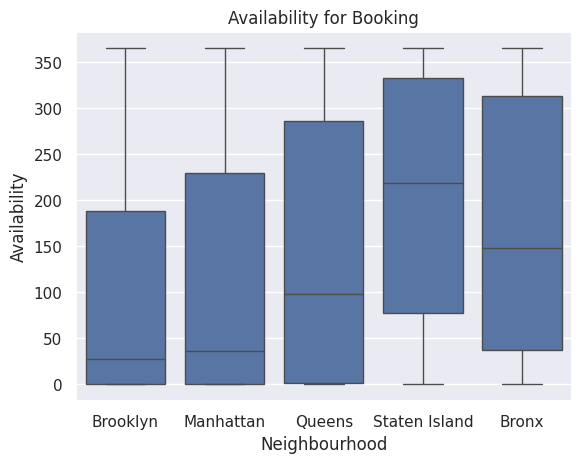

In [ ]:
import seaborn as sns
sns.set_theme()

sns.boxplot(data=airbnb_data, x="neighbourhood_group", y="availability_365").set(title='Availability for Booking', xlabel='Neighbourhood', ylabel='Availability')



*   What is also worth pointing is the number of days in the year that the accommodation is available for tenancy in each neighbourhood.

*   Brooklyn and Manhattan have very similar distributions.

*   In addiction in the diagram below we can see that the availability of accommodations in the Staten Island area tends to have a somewhat more symmetrical distribution.

*   Unlike the rest of the regions which have positively skewed,that the median number of days that the airbnbs is available is stricly less thatn the average of the number of days that the airbnbs is available.

* We notice that in the Brooklyn and Manhattan areas the minimum value coincides with the value of the first quartile.

* Finally, in our dataset we see that we do not have any outliers.




In [ ]:
airbnb_data.groupby('neighbourhood_group')['availability_365'].median()


neighbourhood_group
Bronx            148.0
Brooklyn          28.0
Manhattan         36.0
Queens            98.0
Staten Island    219.0
Name: availability_365, dtype: float64

In [ ]:
airbnb_data.groupby('neighbourhood_group')['availability_365'].mean()


neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64

An interesting question is in which neighborhood each accomondation type was most popular.

As we can see from the table below in Manhattan most airbnbs were entire homes or appartments,while in Brooklyn the most airbnbs were private rooms.The airbnbs which were shared rooms were the least prefeared in all neighbourhoods with the Manhattan to have the majority of them.

In [ ]:
x = pd.crosstab(index=airbnb_data["room_type"], columns=airbnb_data["neighbourhood_group"])
x

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,379,9559,13199,2096,176
Private room,652,10132,7982,3372,188
Shared room,60,413,480,198,9


Something that we can visually check from the barchart below.


Text(0.5, 0.98, 'Bar Plot of room type by location')

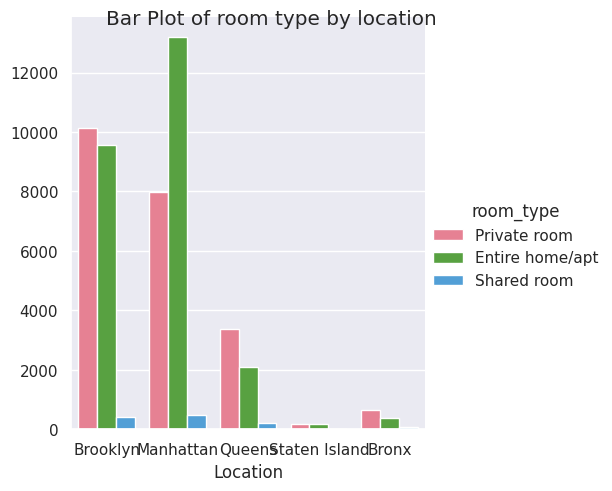

In [ ]:
import seaborn as sns
sns.set_theme()
g =sns.catplot(x ="neighbourhood_group", hue ="room_type",kind ="count", data = airbnb_data,palette="husl")
g.set_axis_labels("Location","")
g.fig.suptitle("Bar Plot of room type by location")


The next step  is too categorize the price using the quantiles.


In [ ]:
airbnb_data['price_grp'] = pd.qcut(airbnb_data['price'],
                                    q=[.0, .25, .5, .75,1],
                                   labels=["Cheap","Average","Expensive","Super Expensive"])

Something more interesting is to see which Airbnb has been available for more than six months. To be more precise that means that which Airbnb is available for more than 180 days(6*30=180) will be categorized as 1 in a new variable 'availability_6m' and 0 is there is available for less than 6 months.

In [ ]:
airbnb_data.loc[airbnb_data['availability_365']> 180, 'availability_6m'] = 'More than 6 months'
airbnb_data.loc[airbnb_data['availability_365']<=180, 'availability_6m'] = 'Less than 6 months'

So the new dataset is :

In [ ]:
airbnb_data.head()

,id,neighbourhood_group,room_type,price,availability_365,price_grp,availability_6m
0,2539,Brooklyn,Private room,149,365,Expensive,More than 6 months
1,2595,Manhattan,Entire home/apt,225,355,Super Expensive,More than 6 months
2,3647,Manhattan,Private room,150,365,Expensive,More than 6 months
3,3831,Brooklyn,Entire home/apt,89,194,Average,More than 6 months
4,5022,Manhattan,Entire home/apt,80,0,Average,Less than 6 months


Moreover the accommodations in all price group (price_grp) most of them they have been available for less than 6 months.

In [ ]:
x2 =pd.crosstab(index=airbnb_data['availability_6m'],columns=airbnb_data['price_grp'])
x2

price_grp,Cheap,Average,Expensive,Super Expensive
availability_6m,,,,
Less than 6 months,8953,9060,8905,7613
More than 6 months,3418,3041,3341,4564


That is something that we can see and from the bar chart below.

Text(0.5, 0.98, 'Bar Plot For Availability By Price Group')

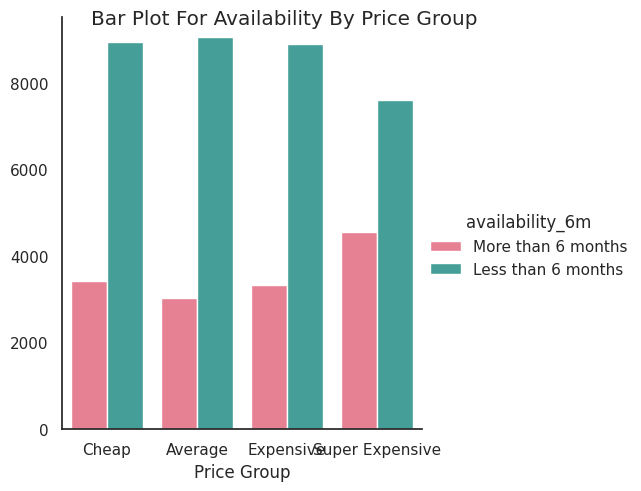

In [ ]:
sns.set_theme(style="white", palette="Set2")
s =sns.catplot(x='price_grp',hue='availability_6m',kind='count',data=airbnb_data,palette='husl')
s.set_axis_labels("Price Group","")
s.fig.suptitle("Bar Plot For Availability By Price Group")


Additional the average price of the houses that were available for less than 6 months were 142\$ while the average price for the Airbnbs that were available for more than 6 months stood at 178\$.  

In [ ]:
airbnb_data.groupby('availability_6m')['price'].mean()

availability_6m
Less than 6 months    142.007587
More than 6 months    178.474937
Name: price, dtype: float64

Furthermore we will check the average price in each price group.
More speciffically the average price for the airbnbs that are in the category Cheap are 50\$, in the category Average the mean price amounted 87\$.
While the houses that were in expensive group with an average approximately 140\$ and the houses that were in Super Expensive group were 335\$.

In [ ]:
airbnb_data.groupby('price_grp')['price'].mean()

price_grp
Cheap               50.680220
Average             87.048260
Expensive          139.150988
Super Expensive    335.295968
Name: price, dtype: float64

The following dataset will have all the columns but only for the neighbourhood Bronx and Staten Island and will be named **data**.

In [ ]:
data = airbnb_data[(airbnb_data["neighbourhood_group"] == 'Bronx') | (airbnb_data["neighbourhood_group"] == 'Staten Island')]

data.head()

,id,neighbourhood_group,room_type,price,availability_365,price_grp,availability_6m
169,42882,Staten Island,Private room,70,312,Average,More than 6 months
171,44096,Bronx,Private room,40,353,Cheap,More than 6 months
207,54626,Bronx,Private room,45,323,Cheap,More than 6 months
249,62452,Staten Island,Private room,36,360,Cheap,More than 6 months
250,62461,Staten Island,Private room,37,0,Cheap,Less than 6 months


First we will check  the availability of booking in New York,from the first dataset,using the boxplot.
In this boxplot there are  include all of the neighbourhoods.

The first thing that we observe is  that the minimum value is equal represented with the 25th percentile(Q1) to zero. The average number of days that an airbnb is available in New York is less than 50 days and the 75% of the days that is available are below 227. Finally the maximum value is more than 350 and we do not have outliers.

Moreover from the table we see that the median is stricly less that the mean, something that indicates the fact that the distribution is positively skewed distridution.

In [ ]:
airbnb_data['availability_365'].describe(include='all')

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

[Text(0.5, 1.0, 'Availability for Booking'),
 Text(0.5, 0, 'NEW YORK'),
 Text(0, 0.5, 'Availability')]

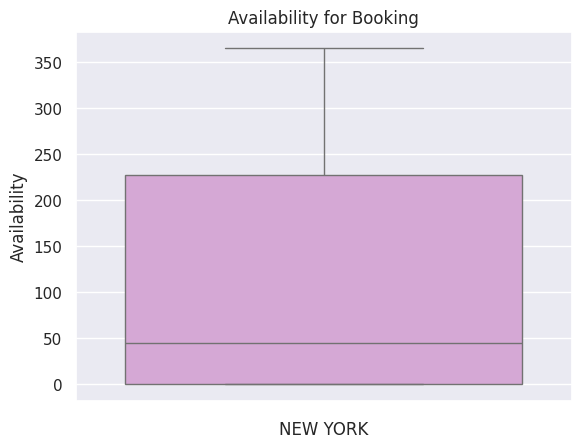

In [ ]:
sns.set_theme()

sns.boxplot(data=airbnb_data, y="availability_365",color='plum').set(title='Availability for Booking', xlabel='NEW YORK', ylabel='Availability')

However in the second dataset that we have the data only for the neighbourhoods Bronx and Staten Island.

The first thing that we observe is that the data have a  more symmetrical siatridution in contrast with the boxplot above.

In [ ]:
data['availability_365'].describe(include='all')

count    1464.000000
mean      174.400956
std       135.156540
min         0.000000
25%        46.000000
50%       167.000000
75%       319.000000
max       365.000000
Name: availability_365, dtype: float64

[Text(0.5, 1.0, 'Availability for Booking'),
 Text(0.5, 0, 'Bronx and Staten Island'),
 Text(0, 0.5, 'Availability')]

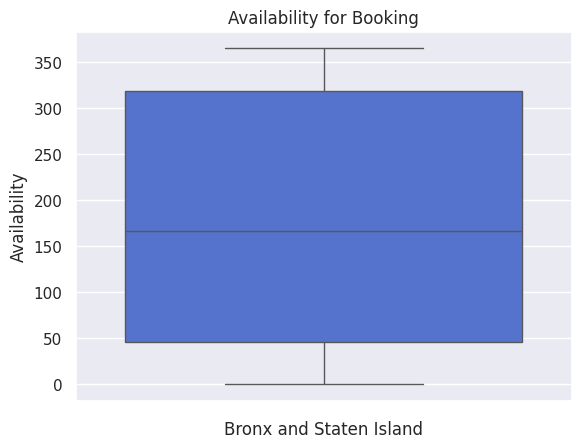

In [ ]:
sns.set_theme()
sns.boxplot(data=data, y="availability_365",color='royalblue').set(title='Availability for Booking', xlabel='Bronx and Staten Island', ylabel='Availability')

The largest amount of money that they have payed for an airbnb  in the dataset that conatains only the neighbourhoods Bronx and Staten Island (named data) is  5000\$.

In [ ]:
data['price'].max()

5000

In [ ]:
airbnb_data['price'].max()

10000


In our analysis, we examined the distridution of the variable price in the both dataset,namely airbnb_data and data.

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis


The skewness of the variable price in the first dataset named airbnb_data is equal to 19.11

In [ ]:
print(skew(airbnb_data['price']))


19.118352459553982



And  the Kurtosis to the dataset airbnb_data is 585.61.

In [ ]:
print(kurtosis(airbnb_data['price']))


585.6128670279669


From the above results we can conclude that the distridution of the variable  price in the dataset airbnb_data is positively skewed distribution.

Admittedly,from the skewness we can also conclude tha there is a significant concentration of lower priced registration, whith a long tail of higher priced registration on the right side of the distridution.



While from the kurtosis that the distridution in the dataset airbnb_data  is leptokurtic.



From the high kurtosis value we can assume that the high level of peakedness and tail thickness in the distribution of one or more variables within the dataset airbnb_data.This suggest that market with a signifficant price variation ,extreme price values(both high and low),

Additionally  for the dataset data we can see that the skewness of the variable price is equal to 19.83 while the kurtosis in the dataset data is 526.85.

In [ ]:
print(skew(data['price']))

19.83103452102658


In [ ]:
print(kurtosis(data['price']))

526.8524089866654


From the kurtosis values suggests a leptokurtic distribution for the variable price, there are some extreme prices but the variation is less than in the dataset named airbnb_data .

Obviously, the  high skewness, in both datasets, indicates that there are more low-priced airbnb facilities with few high-priced.

Even thought, the kirtosis values for the  real estate market in the second dataset,named data, which contain only the neighbourhoods Bronx and Staten Island, indicates to be slightly stable in contrast with the first dataset, named airbnb_data.



One way to normalize the data is to use the log transformation.
The log transformation normalize  the right-skewed distribution,so



In [ ]:
print(skew(np.log(airbnb_data['price']+10**(-6))))

-2.875317509332607


In [ ]:
print(kurtosis(np.log(airbnb_data['price']+10**(-6))))


83.53221850343884


In [ ]:
print(skew(np.log(data['price']+10**(-6))))

-7.921331770489424


In [ ]:
print(kurtosis(np.log(data['price']+10**(-6))))

196.2297858450506


12

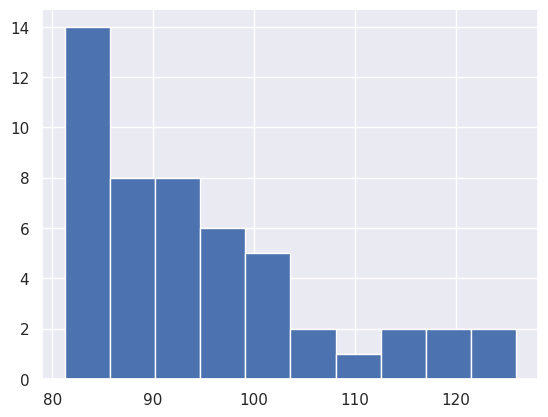

In [ ]:
import matplotlib.pyplot as plt

res = []

for i in range(50):
    ind = np.random.choice(data['price'].index, 150)
    res.append(data['price'][ind].mean())

plt.hist(res)
plt.show()
